# ANNs With Keras

## The Perceptron Architecture

If the data follows a linear pattern then the Perceptron model will converge

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Only the iris setosa class

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2,0.5], [3,1]]
y_pred = per_clf.predict(X_new) # Predicts true or false for these 2 flowers

The sklearn Perceptron = SGDClassifier with a constant learning rate.

## The Multilayer Perceptron(MLP) and Backpropagation

An MLP is composed of one input layer, one or more layers of Threshold Logic Units(TLUs) called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are called the lower layers and the ones close to the outputs are usually called the upper layers. <b>If the signal flows only in one direction (from the inputs to the outputs), then it is an example of a feedforward neural network(FNN).</b> <br> If an ANN contains a deep stack of hidden layers, it is called a deep neural network(DNN). 

To train MLPs you do <b>Backpropagation</b> which involves a combination of reverse-mode autodiff and gradient descent. With reverse-mode autodiff you can go through the model forward and backwords once and be able to calculate the gradient with respect to each weight and bias of the model. You can use this gradiant to tweak each the model in order to reduce the neural network's error. Repeat this enough times and the model will eventually reach a minimum. Backpropagation is the most popular training technique for Neural Networks

The 3 most common activation functions are:
1. The Sigmoid Function
2. The hyperbolic tangent function
3. The rectified linear unit function(ReLU)

## Regression MLPs

For most regression MLPs you only need one output neuron. However, for multivariate regression(i.e. to predict multiple values at once.) you need one output neuron for each output dimension. An example of multivariate regression is if you want to find the center of an object in an image, you need a 2d coordiante, therefore you need two output neurons. If you want to make a box around the object then you also need a width and a height output, now you need 4 output neurons. 

In [2]:
### Regression MLP using Sklearn ###
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
rmse

0.5053326657967985

Sklearn has simple, easy to use MLP classes and functions but has limited features. This is why Keras/Tensorflow/PyTorch is a better choice in most cases.

## Classification MLPs

MLPs can also be used for classification tasks. For binary classification you need one output layer that will spit out a 0 or 1, and will most likly use a sigmoid activation function.<br> For multilabel binary classification tasks (ex. classifiying emails as spam or ham and simultaneously predict urgent or nonurgent.) you need an output neuron for each class both using sigmoid activation functions. The first would output the probablity for span or ham, and the 2nd the probability for urgent or nonurgent. <br> For multiclass classification (ex. MNIST dataset) you would need one output neuron for each class and should use the softmax activation function for the <b>whole output layer</b>

A typical loss function for predicting probability distributions is the cross-entropy loss. 

## MLPs with Keras

### Building an image classifier using Keras Sequential API

#### Using keras to load dataset

In [4]:
import tensorflow as tf

2024-12-25 21:46:00.492208: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-25 21:46:00.500670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735184760.512014   12206 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735184760.515349   12206 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 21:46:00.526381: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

In [8]:
# Scale pixel intensites down to scale of 0-1
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

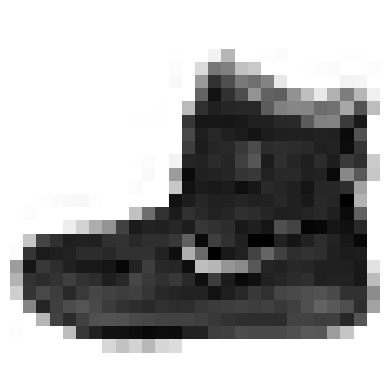

In [10]:
# extra code
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
class_names[y_train[0]]

'Ankle boot'

#### Creating the model using the sequential API

In [12]:
## Multiclass Classification MLP with two hidden layers
tf.random.set_seed(42)
# Most basic keras model type
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.Input(shape=[28,28]))
# Flatten layer converts the input image(2d) into a 1d array
model.add(tf.keras.layers.Flatten())
# First Dense layer
model.add(tf.keras.layers.Dense(300, activation='relu'))
# Second Dense layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
# Output layer (Softmax activation function for multiclass classification)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

I0000 00:00:1735184762.200519   12206 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9865 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [13]:
model.summary()
# Note the None in output shape means that the batch size can be anything

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

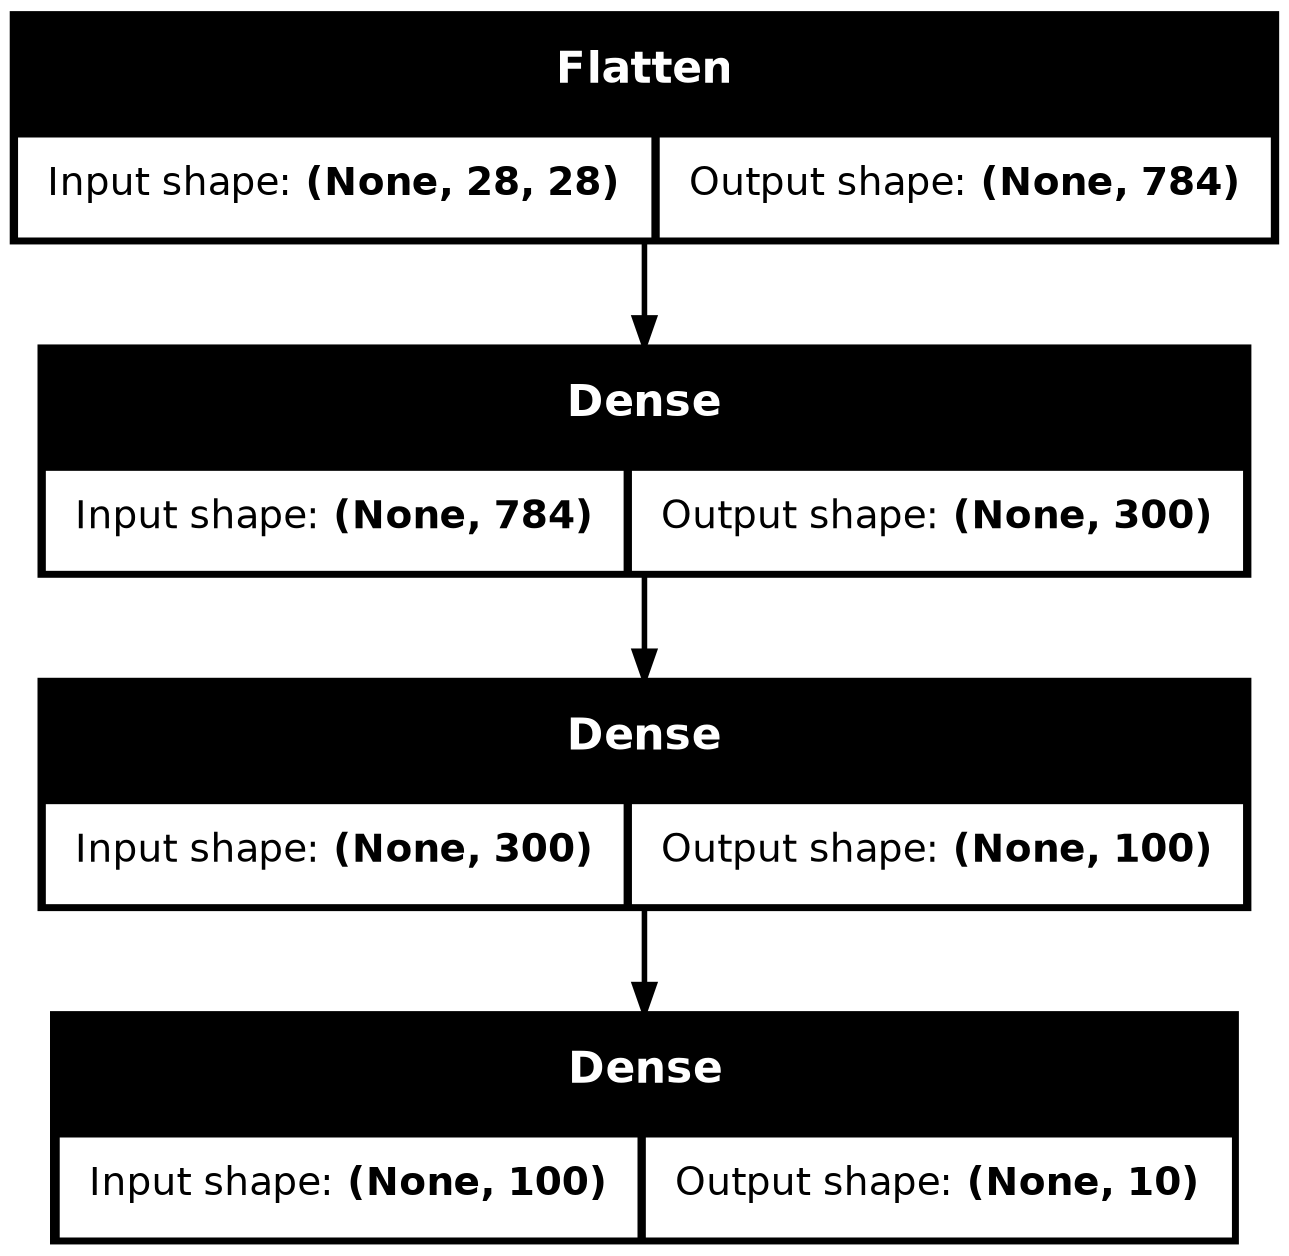

In [14]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [15]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer('dense') is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()
weights
# Weights should be Non 0 and should all be different in order for backpropagation to work

array([[-0.05848224, -0.01806102,  0.00794241, ...,  0.05462353,
        -0.07372815,  0.0584065 ],
       [ 0.06486163, -0.01284732,  0.04247969, ..., -0.04158878,
        -0.074296  , -0.04249261],
       [ 0.07432091,  0.05627604, -0.04045559, ..., -0.01397156,
        -0.01698391,  0.0079721 ],
       ...,
       [-0.03636499,  0.0116474 ,  0.02285393, ...,  0.05960545,
        -0.02121853, -0.03516285],
       [-0.0605391 , -0.03347765, -0.03487551, ...,  0.05896811,
         0.06271727, -0.05296837],
       [ 0.01532726,  0.04991872, -0.04341265, ..., -0.00192603,
        -0.03313851,  0.0518095 ]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

#### Compiling the Model

In [22]:
model.compile(loss='sparse_categorical_crossentropy', ## This is used because we have sparse labels and it is multiclass classification
             optimizer='sgd', ## SGD means stochastic gradient descent. 
             metrics=['accuracy']) ## Since this is a classifier, accuracy is a simple metric to use

#### Training and Evaluating the Model

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


I0000 00:00:1735184763.240194   12290 service.cc:148] XLA service 0x7b143c017b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735184763.240215   12290 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-12-25 21:46:03.248684: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735184763.275573   12290 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-25 21:46:03.288591: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.3 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2024-12-25 21:46:0

 181/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.4118 - loss: 1.8595

I0000 00:00:1735184765.678588   12290 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1674/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.6675 - loss: 1.0465

2024-12-25 21:46:07.897218: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38', 460 bytes spill stores, 496 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - loss: 1.0385  

2024-12-25 21:46:10.853699: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 276 bytes spill stores, 332 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6699 - loss: 1.0383 - val_accuracy: 0.8298 - val_loss: 0.5085
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.8246 - loss: 0.5107 - val_accuracy: 0.8374 - val_loss: 0.4543
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.8410 - loss: 0.4564 - val_accuracy: 0.8446 - val_loss: 0.4300
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.8515 - loss: 0.4263 - val_accuracy: 0.8484 - val_loss: 0.4145
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.8592 - loss: 0.4047 - val_accuracy: 0.8534 - val_loss: 0.4038
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.8646 - loss: 0.3875 - val_accuracy: 0.8566 - val_loss: 0.3944
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.8691 - loss: 0.3733 - val_accuracy: 0.8574 - val_loss: 0.3878
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.8732 - loss: 0.3610

If performance on training data is much better than the performance on validation data then either the model is overfitting, or there is a bug, such as a data mismatch between the training and validation data

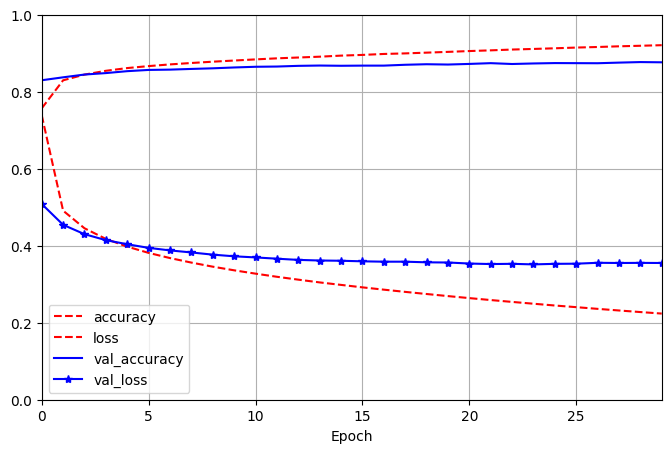

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0, 29], ylim=[0,1], grid=True, xlabel='Epoch',
    style=['r--', 'r--', 'b-', 'b-*'])
plt.show()

In [25]:
model.evaluate(X_test, y_test)

311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8724 - loss: 0.3738

2024-12-25 21:46:57.923980: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 292 bytes spill stores, 360 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8724 - loss: 0.3738


[0.37154653668403625, 0.871399998664856]

#### Using the Model to make predictions

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2024-12-25 21:46:58.880871: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17', 276 bytes spill stores, 332 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.03, 0.  , 0.84],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
# If you only want the predicted class not the probablities then use argmax()
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP using the Sequential API

In [29]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [30]:
# Very similar process to Classifer with Sequential API
tf.random.set_seed(42)
## Normalization layer does the same thing as Sklearns StandardScaler
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:]) 
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=[tf.metrics.RootMeanSquaredError])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20


/home/dude/Desktop/env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.7210 - root_mean_squared_error: 1.2670 - val_loss: 0.4851 - val_root_mean_squared_error: 0.6965
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4177 - root_mean_squared_error: 0.6458 - val_loss: 0.5943 - val_root_mean_squared_error: 0.7709
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3710 - root_mean_squared_error: 0.6089 - val_loss: 0.7360 - val_root_mean_squared_error: 0.8579
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3546 - root_mean_squared_error: 0.5954 - val_loss: 1.5620 - val_root_mean_squared_error: 1.2498
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3442 - root_mean_squared_error: 0.5866 - val_loss: 2.1360 - val_root_mean_squared_error: 1.4615
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3331 - root_mean_squared_error: 0.5771 - val_loss: 0.8565 - val_root_mean_squared_error: 0.9255
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3

array([[0.44972998],
       [1.1950458 ],
       [5.0637507 ]], dtype=float32)